#  Clustering 2

In [ ]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from sklearn import metrics
from sklearn.datasets import make_blobs, make_moons, load_iris, load_digits
from sklearn.cluster import *
from sklearn.neighbors import kneighbors_graph
from sklearn.metrics import homogeneity_score, homogeneity_completeness_v_measure
from sklearn.preprocessing import scale

from time import time

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# Create color maps
#cmap = ListedColormap(["Red","Green","Blue"])
color_array = ["#984ea3","#a65628","#ffff33","#4daf4a","#ff7f00", "#e41a1c", "#377eb8"]
cmap = ListedColormap(color_array)
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

## Пример: набор данных MNIST

Набор данных рукописных цифр MNIST состоит из изображений рукописных цифр вместе с метками, указывающими, какая цифра находится на каждом изображении.

Поскольку в этом наборе данных присутствуют как объекты, так и метки (а метки для больших наборов данных обычно трудно/дорого получить), этот набор данных часто используется в качестве эталона для сравнения различных методов.
Например, [эта веб-страница](http://yann.lecun.com/exdb/mnist/) описывает множество различных результатов классификации в MNIST (обратите внимание, тесты на этом веб-сайте предназначены для набора данных большего размера и с более высоким разрешением, чем мы воспользуюсь.) Чтобы увидеть сравнение методов классификации, реализованных в scikit-learn в наборе данных MNIST, см.
[эта страница](http://scikit-learn.org/stable/auto_examples/classification/plot_digits_classification.html).
Набор данных MNIST также часто используется для сравнительного анализа алгоритмов кластеризации, и поскольку он имеет метки, мы можем оценить однородность или чистоту кластеров.

Существует несколько версий набора данных. Мы будем использовать тот, который встроен в scikit-learn и описан [здесь](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html).

* Классы: 10
* Образцы на класс: $\approx$180.
* Всего образцов: 1797
* Размерность: 64 (8 пикселей на 8 пикселей)
* Возможности: целые числа 0–16.

Вот несколько примеров изображений. Обратите внимание, что цифры нормализованы по размеру и центрированы в изображении фиксированного размера ($8\times8$ пикселей).

<img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_digits_classification_001.png" width="500">

<class 'numpy.ndarray'>
n_digits: 10, n_samples 1797, n_features 64


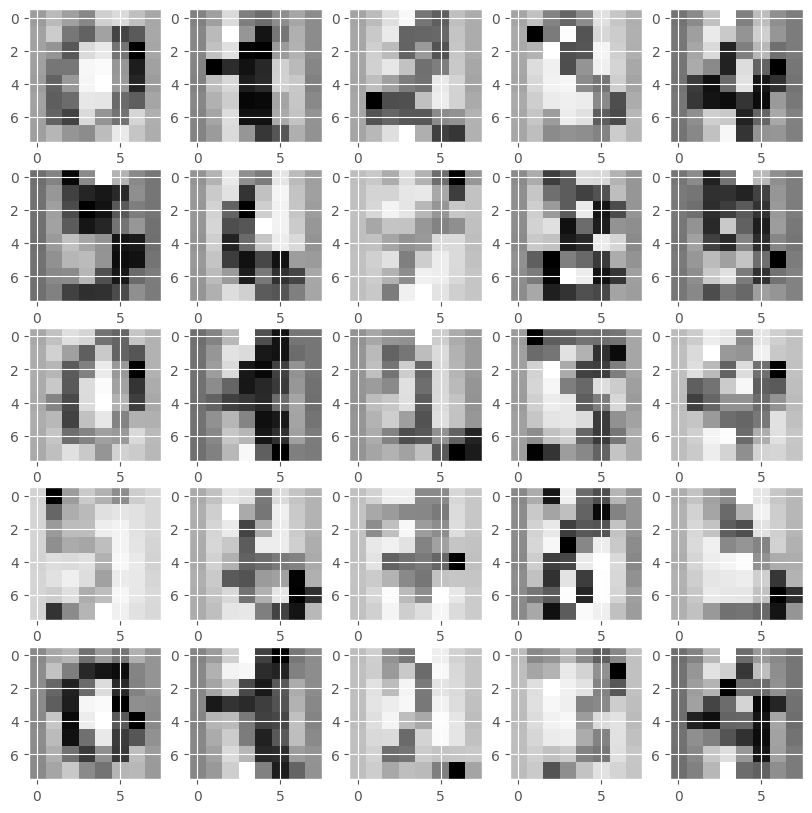

In [ ]:
digits = load_digits()
X = scale(digits.data)
y = digits.target
print(type(X))

n_samples, n_features = X.shape
n_digits = len(np.unique(digits.target))
print("n_digits: %d, n_samples %d, n_features %d" % (n_digits, n_samples, n_features))

plt.figure(figsize= (10, 10))
for ii in np.arange(25):
    plt.subplot(5, 5, ii+1)
    plt.imshow(np.reshape(X[ii,:],(8,8)), cmap='Greys',interpolation='none')
plt.show()

#### K-means clustering
Сначала мы используем метод k-средних для кластеризации набора данных и вычисления показателя однородности для кластеризации.

In [ ]:
# fit k-means to data
kmeans_model = KMeans(n_clusters=n_digits, n_init=10)
kmeans_model.fit(X)

# use labels to compute homogeneity score
metrics.homogeneity_score(labels_true=y, labels_pred=kmeans_model.labels_)

0.667912072596869

#### Упражнение: Иерархическая кластеризация
Используйте метод иерархической кластеризации для кластеризации набора данных. Снова вычислите однородность.

*Подсказка:* Используйте функцию scikit-learn *AgglomerativeClustering*.

Homogeneity оценка: 0.7584914070326005


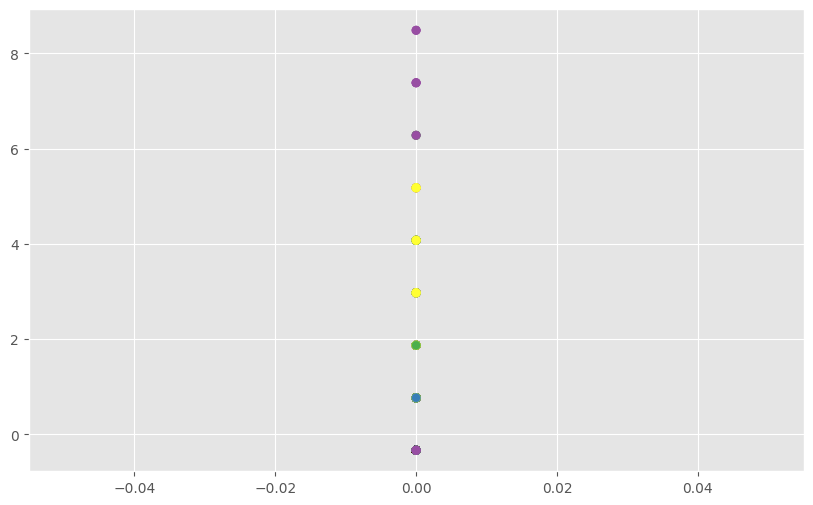

In [6]:
n_clusters = len(set(y))

# Применим иерархическую кластеризацию
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters)
agg_clusters = agg_clustering.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=agg_clusters,  marker="o", cmap=cmap);
# Вычислим однородность
homogeneity = homogeneity_score(y, agg_clusters)
print("Homogeneity оценка:", homogeneity)

#### Упражнение: DBScan

Используйте DBScan для кластеризации набора данных. Проблема, с которой вы столкнетесь, — это выбор $\epsilon$. Вы можете использовать функцию DistanceMetric, чтобы получить представление о типичных расстояниях между точками.

Предполагаемое количество кластеров: 3
Примерное количество точек шума: 13
Однородность: 0.896
Полнота: 0.777
V-мера: 0.832


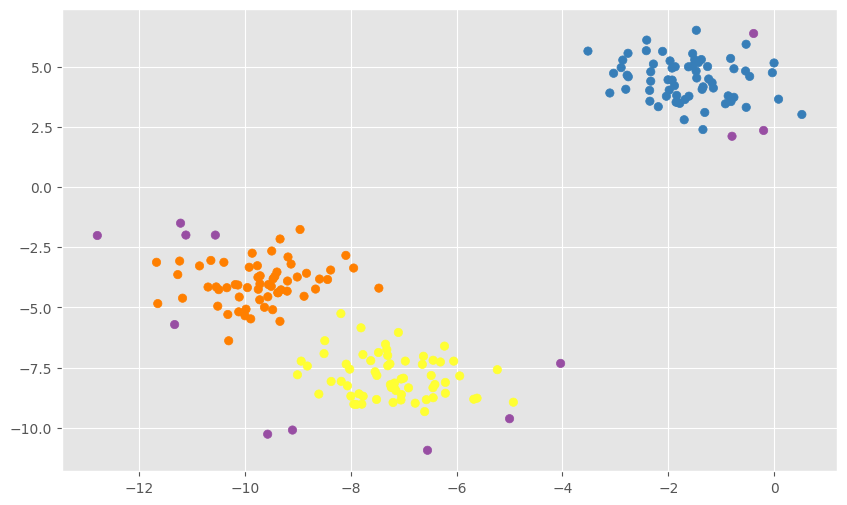

In [12]:
import pandas as pd
from sklearn.metrics import DistanceMetric

dist = DistanceMetric.get_metric('euclidean')
distances = dist.pairwise(X)
distances
df = pd.DataFrame(distances)
df.describe()
dbscan = DBSCAN(eps=1.0, min_samples=5)
dbscan.fit(X)
y_pred = dbscan.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred,  marker="o", cmap=cmap);
labels = dbscan.labels_

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Предполагаемое количество кластеров: %d' % n_clusters_)
print('Примерное количество точек шума: %d' % n_noise_)
print("Однородность: %0.3f" % metrics.homogeneity_score(y, labels))
print("Полнота: %0.3f" % metrics.completeness_score(y, labels))
print("V-мера: %0.3f" % metrics.v_measure_score(y, labels))

## MNIST: Другие методы кластеризации
Ознакомьтесь с методами кластеризации и опциями различных методов на [странице scikit-learn](http://scikit-learn.org/stable/modules/clustering.html).

**Упражнение.** Изменив следующий код, попытайтесь найти для этого метод кластеризации с наибольшим показателем однородности.

In [13]:
print(50 * '_')
print('% 9s' % 'method' + '                   time' + '      homo')

def compare_method(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('% 25s   %.2fs     %.3f ' % (name, (time() - t0), metrics.homogeneity_score(y, estimator.labels_)))

# K-Means с использованием метода k-means++
method = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
compare_method(estimator=method, name="k-means++", data=X)

# K-Means с использованием случайной инициализации
method = KMeans(init='random', n_clusters=n_digits, n_init=10)
compare_method(estimator=method, name="k-means random", data=X)

# DBSCAN
method = DBSCAN(eps=0.5, min_samples=5)
compare_method(estimator=method, name="DBSCAN", data=X)

# Иерархическая кластеризация
method = AgglomerativeClustering(n_clusters=n_digits)
compare_method(estimator=method, name="Agglomerative", data=X)

__________________________________________________
   method                   time      homo
                k-means++   0.08s     0.969 
           k-means random   0.03s     0.982 
                   DBSCAN   0.00s     0.693 
            Agglomerative   0.00s     0.968 
